# Intro to AI (CS331): Project 2
#### Name: 
#### Roll Number: 

In [1130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Regression
## Dataset [5 marks]

### Loading the Dataset
Let's start by loading the dataset. For this part, we will use the `bike_hour.csv`. Load the daataset into a dataframe using the Pandas library.

In [1131]:
# code here
bikes_df = pd.read_csv('bike_hour.csv')
# print(bikes_df)

### Cleaning the Dataset
Make sure there are no NaN or null values in the dataset. If there are any, remove those rows.

In [1132]:
# code here
bikes_df.dropna(inplace = True)

## Polynomial Regression by Least Squares [20 marks]

In this part, we are going to use pseudo-inverse, bias error and variance error, to find the best fit equation for our dataset. We are going to make use of the equation:
$$
    w = (A^TA)^{-1}A^Ty
$$
We already have our dataset. For this question, we are going to focus on univariate polynomial regression, so lets select on feature from our dataset that we are going to use and split it into training and test datasets.

In [1133]:
# write the code to extract the number of bikes rented and the "atemp" feature from the dataset.
# Do a 70 30 split to make test and train datasets.

n = bikes_df['atemp']

train_df,test_df = train_test_split(bikes_df,test_size=0.3)

numBikes_train = train_df['cnt']
atemp_train = train_df['atemp']
numBikes_test = test_df['cnt']
atemp_test = test_df['atemp']



A=atemp_train.to_numpy()
B=numBikes_train.to_numpy()
A=A.reshape(-1,1)
B=B.reshape(-1,1)

C=atemp_test.to_numpy()
D=numBikes_test.to_numpy()
C=C.reshape(-1,1)
D=D.reshape(-1,1)

nmatrix=C**0
nmatrix=np.ones((len(C), 1))

matrix = A**0

# for i in range(1,20):
#     nmatrix=np.column_stack(matrix,A**i)

matrix = np.ones((len(A), 1))

for i in range(1, 21):
    matrix = np.column_stack((matrix, A**i))
    nmatrix=np.column_stack((nmatrix, C**i))

mat_transpose = np.transpose(matrix)
w = (np.linalg.inv(np.dot(mat_transpose,matrix)))

w=np.dot(w,mat_transpose)
w=np.dot(w,B)


print(w)
print(w.shape)




[[ 1.38299388e+04]
 [-2.69610302e+05]
 [ 3.08740214e+06]
 [-2.17426545e+07]
 [ 6.61092513e+07]
 [ 2.04641757e+08]
 [-2.77157201e+09]
 [ 1.17119728e+10]
 [-2.59744272e+10]
 [ 2.82006253e+10]
 [-1.41467954e+09]
 [-2.87376290e+10]
 [ 1.59662299e+10]
 [ 2.38002961e+10]
 [-3.97695719e+10]
 [ 4.66575662e+10]
 [-7.36631770e+10]
 [ 8.28339963e+10]
 [-5.01269059e+10]
 [ 1.44115806e+10]
 [-1.37612397e+09]]
(21, 1)


Now that we have our dataset, use it to make a graph of variance loss (test loss) and bias loss (training loss), using the equation given above. Do this for polynomials 1: ($y = a+bx$) till 20 ($y = a+  bx + cx^2 + ... + ux^{20}$) The reuslting graph you get should resemeble the one shown in the manual.

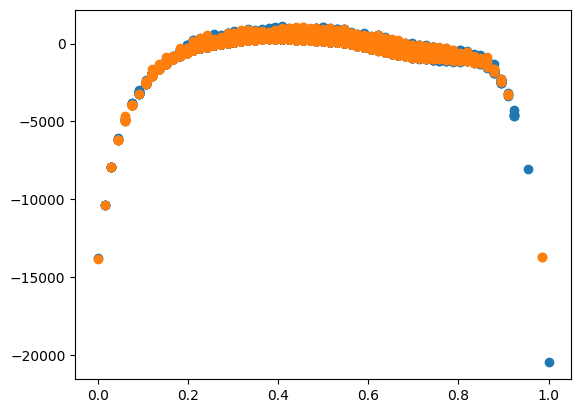

In [1134]:
# code here

# y original is given
# y^ = matrix . w

y_hat=np.dot(matrix,w)

variance_y_hat=np.dot(nmatrix,w)

# B = cnt training
bias_error=B-y_hat
# D = cnt testing
variance_error=D-variance_y_hat


# zz=np.arange(0,21)

plt.scatter(A,bias_error)
plt.scatter(C,variance_error)
# plt.plot(n,final_y)
plt.show()

# plt.plot()

QUESTION: Which polynomial is most optimal to use for this dataset? Explain your choice and mention both bias and variance losses for this polynomial. 

### ANSWER here:


## Linear Regression by Gradient Descent [15 marks]
You are now going to implement linear regression using gradient descent. Unlike in the above part, your regression is now linerar but should work for any number of variables (multivariate liner regression). For this part, start by using the complete dataframe with all teh features instead of just one feature, as we did in the above part. 

In [1135]:
# if you need to load the complete dataframe again or call it again, do so here

Let us start by removing any features (columns), which will not be useful for us. From the complete dataframe, remove the columns that you think are not going to be useful for regression. In the markdown cell, **EXPLAIN  your choice** behind removing the columns that you did.

In [1136]:
# code here

#### ANSWER here: 

### Splitting the dataset
Similar to as you already did, make an 70 30 split to divide the dataset into training and test dataset. If you want, you can use inbuilt libraries for this.
Also divide the datasets into features and labels, which will results in 4 variables: X_train, Y_train, X_test, Y_test (you can use different names if you want)

In [1137]:
# code here

### Gradient Descent
Complete the following functions to run linear regression. "y_pred" represents the array of predicted target values that we will get while "y_true" represents the array of labels that we are already provided with.

In [1138]:
def mean_squared_error(y_pred, y_true): # y_pred is the array of the values we get after we multiply weights with the attributes ( h(x) ), and y_true is an array of true labels
    pass
    # code here
    


def gradient_des(x, thetas, y_pred, y_true, alpha):
    pass
    # code here and return both thetas and the losses
    # returning both is important for visualising the losses

### Regression
For the specified number of epochs, run the regression and store the losses and corresponding thetas for each epoch

In [1139]:

epochs = 500  # you are free to play around with this number
theta = ... # initialize an np array of zeros based on the shape of the training sample

losses = []

# code here


### Visualizing the losses
You can run the following cell to see how your losses change with each epoch.

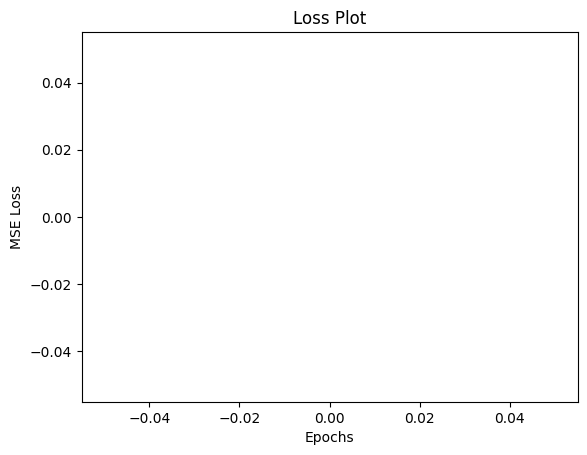

In [1140]:

plt.plot(list(range(len(losses))), losses)
plt.title("Loss Plot")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()


### Testing the model
Now use the final thetas that you got to find the accuracy of the regressor on our test dataset.

In [1141]:
# code here

# LOGISTIC REGRESSION

## Dataset [5 marks]
For this part, we will use the iris dataset provided by sklearn. The dataset library has already been imported in first cell. Use this library to import the iris dataset along with its labels. 

In [1142]:
# code here

### Splitting and changing the dataset
There are two tasks that you have to perform in this task:
1. This dataset contains 3 classes of iris. Irir setosa is linearly seperable from the other two. In you target (labels) array, you have three label values: 0, 1 and 2. Using the information given in the iris dataset, identify which one of these represents Iris Setosa and chage your target values such that instead of having 3 label values, you only have two, where 0 would represent the class Iris Setosa while 1 would mean that the class is not Iris Setosa. 
2. Now that we have the features and the labels extracted, once again make test and train datasets for logistic regression using a 70 30 split. Make sure that the data is properly shuffled.

In [1143]:
# code here

## Logistic Regression by Scratch [15 marks]
We are now going to perform logistic regression by scratch on our training dataset. Complete the following functions.

In [1144]:
def binary_cross_entropy_loss(y_pred, y_true):
    pass
    # code here


def sigmoid(x):
    pass
    # code here


def gradient_des(x, thetas, h_x, y, alpha):
    pass
    # code here and return both thetas and the losses
    # returning both is important for visualising the losses


### Logistic Regression
For the specified number of epochs, run the logistic regression and store the losses and corresponding thetas for each epoch

In [1145]:
epochs = 100  # you are free to play around with this number
theta =  ... # initialize an np array of zeros based on the shape of the training sample

losses = []

# code here


### Visualizing the losses
You can run the following cell to see how your losses change with each epoch.

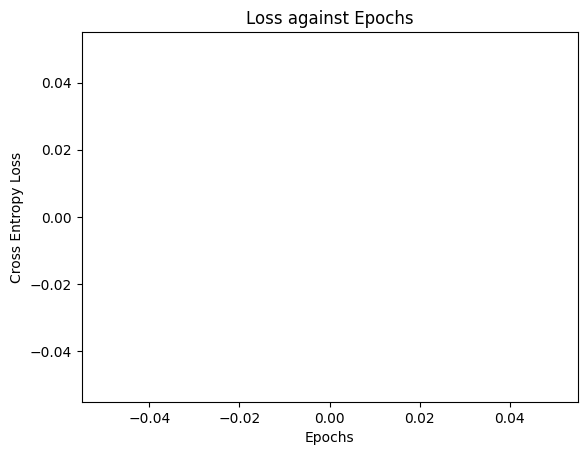

In [1146]:
plt.plot(list(range(len(losses))), losses)
plt.title("Loss against Epochs")
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy Loss")
plt.show()

## K-Fold Cross Validation [15 marks]
As you might have noticed, our iris training set is not that big (with only 105 values). To make our model perform better, we are going to implement k-fold cross-validation.

In k cross-validation, you divide your training set into k parts and use k-1 of them for training, while one part is used for validation. We then rerun this k times, where each time, a different part from the total of k parts is used for validation. Note that the test data set still remains completely seperate.

This will result in you having k different weights (one for each fold). In the end, take na average of all the weights and those will be your final weights.

In [1147]:
k = 5 # we are going to keep k as 5 for this example but your code should not hardocde this value
# code here the k-fold cross validation for the iris training dataset

Use the final averaged weights on the test data and report the Binary Cross Entroly Loss.

In [1148]:
# code here

### Question: 
Did the cross-validation help in making the model better? Why or why not?

### ANSWER here:


## Logistic Regression using Libraries [5 marks]

In [1149]:
import sklearn.linear_model as sl
from sklearn.metrics import log_loss

Now use the above provided libraries to implement [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and use the [Cross Entropy Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html) to report loss on the test dataset. 

In [1150]:
# code here

# SVMs [20 marks]

We are now going to use the SVM library by sklearn on the iris dataset we used for logistic regression. You can either use the same variables, or make a new cell here and import the datset again. However, for the SVM classifier, we are going to extract only the first two features, `Sepal length` and `Sepal width`. 

In [1151]:
# code here to get the iris datset with labels and only the first two features ("Sepal length" and "Sepal width")


## Training and Visualisation
Train the SVM using the iris dataset and make a plot similar to the one shown in the manual. To make the plot, you are going to have to look into the following functions:
- np.meshgrid
- plt.scatter
- plt.contourf

However, you are free to use any functions and libraries that you want to use.

Make three different plits for the following three kernels of SVMs: linear, poly, and rbf.
You are free to play around with SVM parameters like C (regulization parameter) and gamma.

In [1152]:
kernels = ["linear", "poly", "rbf"]
# code here
'''
1. Use the dataset to train the SVM
2. Create a mesh
3. Get the predicted values
4. Plot the graph
'''

'\n1. Use the dataset to train the SVM\n2. Create a mesh\n3. Get the predicted values\n4. Plot the graph\n'

## Testing the SVMs
Using the train-test split of 70-30, find the accuracies for all three SVMs. 

In [1153]:
# code here

### Question: 
Which kernel gave the highest accuracy? Why is that the case?
### ANSWER here:
